In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('./datasett_oppgave2.csv')

label_encoder = LabelEncoder()

# test 
print(df['cp'])

# Automatically transform all categorical columns to numerical values
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['exang'] = label_encoder.fit_transform(df['exang'])



0       typical angina
1         asymptomatic
2         asymptomatic
3          non-anginal
4      atypical angina
            ...       
915       asymptomatic
916     typical angina
917       asymptomatic
918       asymptomatic
919    atypical angina
Name: cp, Length: 920, dtype: object


In [53]:
# test code



print(df['cp']) 

0      3
1      0
2      0
3      2
4      1
      ..
915    0
916    3
917    0
918    0
919    1
Name: cp, Length: 920, dtype: int64


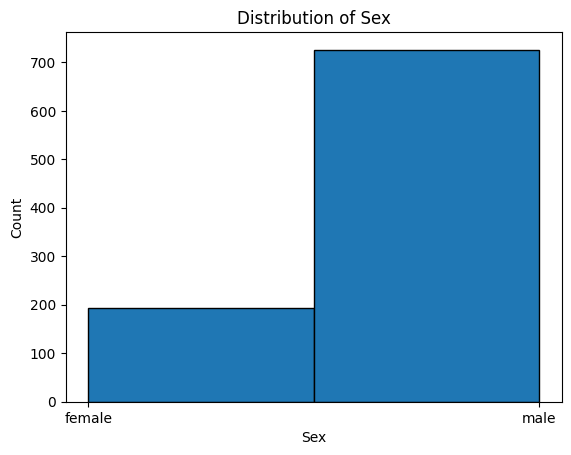

In [50]:
# Lager plot av kjønn
ax = df['sex'].plot(kind='hist',bins=2, edgecolor='black')

# Bytter ut 0 og 1 med male og female for å gjøre det mer leselig
ax.set_xticks([0, 1])
ax.set_xticklabels(['female', 'male'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

In [20]:
import plotly.express as px
import numpy as np

#Drope id
df_no_id = df.drop('id', axis=1)

# Calculate the correlation matrix
corr_matrix = df_no_id.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)

# Create a heatmap of the correlation matrix using plotly
fig = px.imshow(corr_matrix_masked, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix Heatmap')

# Show the plot
fig.show()


AttributeError: 'Axes' object has no attribute 'xsticks'

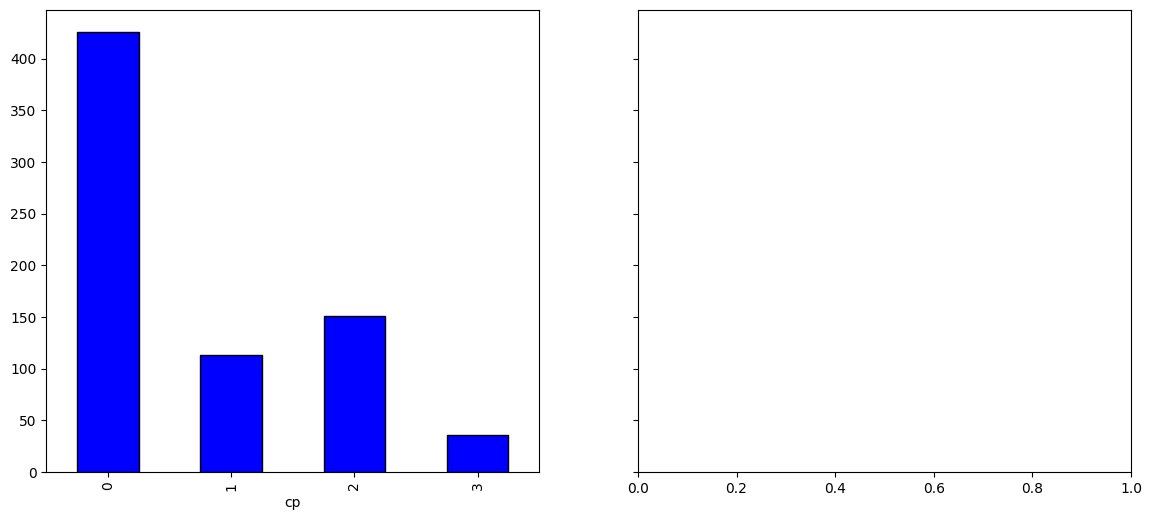

In [56]:
# Separate the data for males and females
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# 3 = typical angina
# 2 = atypical angina
# 1 = non-anginal pain
# 0 = asymptomatic 
# Plot for males
df_male['cp'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='blue', edgecolor='black')
axes[0].set_xticks([0, 1, 2, 3])
axes[0].set_xticklabels(['Asymptomatic', 'non-anginal pain', 'atypical angina', 'Typical Angina'])
axes[0].set_title('Chest Pain Type Distribution for Males')
axes[0].set_xlabel('Chest Pain Type')
axes[0].set_ylabel('Count')

# Plot for females
df_female['cp'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='pink', edgecolor='black')
axes[1].set_title('Chest Pain Type Distribution for Females')
axes[1].set_xlabel('Chest Pain Type')

plt.tight_layout()
plt.show()